In [30]:
%matplotlib inline
import base64
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

OpenCV version: 4.2.0
<class 'bytes'> b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00x\x00x\x00\x00'
<class 'numpy.ndarray'>
1


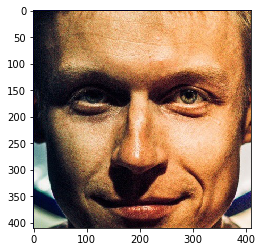

In [133]:
print('OpenCV version:', cv2.__version__)

# Load the cascade
face_cascade = cv2.CascadeClassifier('webserver/haarcascade_frontalface_default.xml')
# Read the input image
fd = open('me.jpg', 'rb')
img_str = fd.read()
fd.close()
print(type(img_str), img_str[:20])
image = Image.open(io.BytesIO(img_str))
# print(img_str)
img = cv2.imdecode(np.frombuffer(img_str, np.float), cv2.IMREAD_COLOR)
print(type(img))
# img = cv2.imdecode()
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.5, 5)
print(len(faces))
if len(faces) > 0:
    # Draw rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 0)
        # Save the output image
        cv2.imwrite('detected.jpg', img[y:y+h, x:x+w])
        plt.imshow(plt.imread('detected.jpg')), plt.show()
        

In [ ]:
face_cascade = cv2.CascadeClassifier('webserver/haarcascade_frontalface_default.xml')
fd = open('me.jpg', 'rb')
img_str = fd.read()
fd.close()
nparr = np.frombuffer(img_str, np.float)
img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray), plt.show()
faces = face_cascade.detectMultiScale(img, 1.1, 5)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 0)
    img = img[y:y+h, x:x+w]
    # Save the output image
#     cv2.imwrite('detected.jpg', img)
# plt.imshow(plt.imread('detected.jpg'))
# Image.open(io.BytesIO(cv2.imencode('.png', img)[1]))
cv2.imencode('.jpg', img)

In [ ]:
fd = open('doge.jpg', 'rb')
a = fd.read()
fd.close()
arr = np.frombuffer(a, np.uint8)
print(arr)

img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('webserver/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
# print(type(faces), faces)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 0)
    img = img[y:y+h, x:x+w]
    # Save the output image
    cv2.imwrite('detected.jpg', img)
        
    
img

In [ ]:
# jpg_original = base64.b64decode(string)
# jpg_as_np = np.frombuffer(jpg_original, dtype=np.uint8)
# img = cv2.imdecode(jpg_as_np, flags=1)

array([[255],
       [216],
       [255],
       ...,
       [143],
       [255],
       [217]], dtype=uint8)

In [1]:
import os
import cv2
import base64
import numpy as np
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils

D_TYPE = np.float32

target = (224, 224)
shape = (1, 224, 224, 3)

def get_faces(image: bytes, cascade_file='frontal_face.xml', extension='.jpg'):
    face_cascade = cv2.CascadeClassifier(filename=cascade_file)
    img = cv2.imdecode(np.frombuffer(image, D_TYPE), cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    faces_found = [img[y:y + h, x:x + w] for (x, y, w, h) in faces]
    if faces_found:
        return cv2.imencode(extension, faces_found[0])[1]

print(get_faces(img_str))

image = Image.open('me.jpg')
image = image.resize(target)
image = img_to_array(image, dtype=D_TYPE)
# print(image)
image = image[None, ...]#np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
image = image.copy(order="C")
print(image.shape, type(image))

image = base64.b64encode(image).decode("utf-8")
print(image[:20])
a = {"id": 1, "image": image}
a = bytes(a['image'], encoding="utf-8")
print(a[:20])
print(base64.decodebytes(a) == base64.b64decode(a))
a = np.frombuffer(base64.b64decode(a), dtype=D_TYPE)
print(a.shape)
a = a.reshape(shape)
print(a.shape)
# print(a[0, ...])
# cv2.imshow('Picture', a[0, ...])
# cv2.waitKey(0)

Using TensorFlow backend.


NameError: name 'img_str' is not defined

In [142]:
!curl -X POST -F img_file=@doge.jpg http://35.195.204.212/predict

Internal Server Error


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 70843  100    21  100 70822     24  81404 --:--:-- --:--:-- --:--:-- 81428


In [2]:
os.environ['HOME']

NameError: name 'os' is not defined